<a href="https://colab.research.google.com/github/mocccca/cmor438/blob/main/Unsupervised%20Learning/K-Means%20Clustering/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**

### **Introduction**

K-Means Clustering is a vector quantization technique, originally developed in signal processing, that aims to divide n observations into k clusters. Each observation is assigned to the cluster with the nearest mean — also called the cluster center or centroid — which acts as the prototype for that cluster. This process effectively partitions the data space into regions known as Voronoi cells.

K-Means is one of the most straightforward and widely used unsupervised machine learning algorithms. Unsupervised algorithms work by drawing patterns or insights from datasets using only input features, without relying on predefined or labeled outcomes.

In this context, a cluster is a group of data points gathered together because they share certain similarities. The algorithm requires you to specify a target number k, which determines how many centroids (representing the centers of the clusters) you want the algorithm to find within the dataset.

Each data point is then assigned to a cluster in a way that minimizes the in-cluster sum of squared distances. Put simply, the K-Means algorithm identifies k centroids and assigns each data point to the nearest one, continuously adjusting to keep the clusters as compact as possible.

The term “means” in K-Means refers to the process of averaging — specifically, calculating the centroid, or the average position of the points in each cluster.

### **General Process**

1. **Input**  
   A set of *unlabeled* feature vectors.

2. **Goal**  
   Group the vectors based on similar features.

3. **Initialize**  
   Randomly choose **K centroids** (where *K* is the number of desired clusters).

These centroids effectively “walk” around the feature space, adjusting their positions
to find the centers of the natural clusters.


#### *Stopping Criteria*

The algorithm stops when **either**:
- The centroids stabilize (no significant change in their positions between iterations).
- The predefined maximum number of iterations is reached.


### *Model Steps*

1. **Compute Distances**  
   For each feature vector, calculate the **Euclidean distance** to each centroid.

2. **Assign Clusters**  
   Assign each feature vector to the nearest centroid.  
   If feature vector **x** is assigned to centroid **c<sub>j</sub>**, then its current label is **j**.

3. **Update Centroids**  
   For each cluster:
   - Let **S<sub>i</sub>** be the set of feature vectors assigned to centroid **c<sub>i</sub>**.
   - Update the centroid as:

     c<sub>i</sub> = (1 / |S<sub>i</sub>|) * Σ (x<sub>j</sub> ∈ S<sub>i</sub>) x<sub>j</sub>

   In other words, calculate the **mean** of the feature vectors in the cluster
   for each dimension and update the centroid accordingly.

4. **Repeat**  
   Go back to Step 1 and repeat until **convergence**.

### *Summary*

The K-Means algorithm iteratively refines the centroids by:
- Assigning points to the nearest centroid,
- Recomputing centroids as the mean of assigned points,
- Repeating until centroids no longer move significantly.

At convergence, the algorithm effectively partitions the data space into **K clusters**,
allowing us to know which points belong to which groups.


### Advantages of K-Means Clustering

- **Simple and Fast**  
  K-Means is easy to understand and implement, with fast computation, especially on large datasets.

- **Efficient on Large Datasets**  
  Works well when the number of clusters *k* is small compared to the number of data points.

- **Scales Well**  
  K-Means scales to large numbers of samples and features.

- **Adaptable**  
  Can be adapted to different types of data by changing the distance metric (e.g., Euclidean, Manhattan).

- **Produces Compact, Well-Separated Clusters**  
  Particularly effective when clusters are roughly spherical and equally sized.


### Disadvantages of K-Means Clustering

- **Requires Predefined Number of Clusters (k)**  
  You must specify *k* in advance, which may not always be known.

- **Sensitive to Initialization**  
  Poorly chosen initial centroids can lead to suboptimal clustering (stuck in local minima).

- **Assumes Spherical Clusters**  
  K-Means assumes clusters are spherical and evenly sized, which may not fit real-world data.

- **Not Robust to Outliers**  
  Outliers can significantly distort centroid positions.

- **Only Works with Numerical Data**  
  K-Means relies on distance metrics that require numeric features (categorical data needs preprocessing).

- **May Converge to Local Minimum**  
  The algorithm does not guarantee finding the global optimum.

### **Application**



### Dataset Description

This dataset uses variables from the Hansen-Leisure Interest Questionnaire (H-LIQ; Hansen, 2020) to predict individuals' dominant RIASEC type using K-Means clustering in our leisure and vocational interests study.



#### *Input Variables: `liq_columns`*

The **H-LIQ** asks participants:
> *"For each of the following activities, please indicate how you feel about doing that activity in your leisure time. Respond based on how you think you would feel about the activity, regardless of whether you have actually done it or how many opportunities you have to do so."*

Responses are rated on:
- 1 = Dislike
- 2 = Indifferent
- 3 = Like

The questionnaire groups activities into **20 leisure categories**:
- `camping outdoors`
- `adventure sports`
- `individual sports`
- `team sports`
- `hunting fishing`
- `cards games`
- `computer activities`
- `building restoring`
- `collecting`
- `gardening nature`
- `arts and crafts`
- `literature writing`
- `cultural arts`
- `dancing`
- `culinary pursuits`
- `community involvement`
- `shopping fashion`
- `socializing`
- `partying`
- `travel`

These variables are collectively referred to as **`liq_columns`** and were used as the input features for K-Means clustering.



#### *Output Variable: `dominant_riasec`*

Participants also provided their scores on the **RIASEC dimensions**:
- `ip_realistic`
- `ip_investigative`
- `ip_artistic`
- `ip_social`
- `ip_enterprising`
- `ip_conventional`

From these, **`dominant_riasec`** was derived as the RIASEC type with the **highest individual score** for each participant, representing their strongest vocational interest profile.



#### *Goal*

The goal was to use **K-Means clustering** on the `liq_columns` (leisure activity preferences) to predict or understand patterns associated with the `dominant_riasec` profiles.



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
class RIASECClusterAnalyzer:
    def __init__(self, n_clusters=6, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        self.pca = PCA(n_components=2)

    def preprocess_data(self, df, features):
        """Preprocess data with error handling"""
        try:
            self.liq_columns = features
            X = df[features].values.astype(float)
            self.X_scaled = self.scaler.fit_transform(X)
            return self.X_scaled
        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            return None

    def fit_clusters(self):
        """Fit clusters with error handling"""
        try:
            self.kmeans.fit(self.X_scaled)
            self.labels = self.kmeans.labels_
            return self.labels
        except Exception as e:
            print(f"Error in clustering: {str(e)}")
            return None

    def evaluate_clusters(self):
        """Evaluate clustering with error handling"""
        try:
            return {
                'silhouette_score': silhouette_score(self.X_scaled, self.labels),
                'n_clusters': len(np.unique(self.labels))
            }
        except Exception as e:
            print(f"Error in evaluation: {str(e)}")
            return None

    def visualize_clusters(self, df, true_labels_col='dominant_riasec'):
        """Visualize clusters with error handling"""
        try:
            X_pca = self.pca.fit_transform(self.X_scaled)

            plt.figure(figsize=(18, 6))

            # Plot 1: True RIASEC labels
            plt.subplot(1, 3, 1)
            sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                          hue=df[true_labels_col], palette='viridis')
            plt.title('True RIASEC Labels')

            # Plot 2: Cluster assignments
            plt.subplot(1, 3, 2)
            sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                          hue=self.labels, palette='viridis')
            plt.title('Cluster Assignments')

            # Plot 3: Cluster centers
            plt.subplot(1, 3, 3)
            centers_pca = self.pca.transform(self.kmeans.cluster_centers_)
            sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                          hue=self.labels, palette='viridis', alpha=0.3)
            sns.scatterplot(x=centers_pca[:, 0], y=centers_pca[:, 1],
                          color='red', marker='X', s=200)
            plt.title('Cluster Centers')

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error in visualization: {str(e)}")

    def get_cluster_stats(self, df):
        """Get comprehensive cluster statistics with error handling"""
        try:
            results = df.copy()
            results['cluster'] = self.labels

            # 1. Cluster to RIASEC mapping
            print("\nCluster to RIASEC distribution:")
            riasec_dist = results.groupby('cluster')['dominant_riasec'].value_counts(normalize=True)
            print(riasec_dist)

            # 2. Cluster sizes
            print("\nCluster sizes:")
            print(results['cluster'].value_counts().sort_index())

            # 3. Mean LIQ scores by cluster
            print("\nTop LIQ activities by cluster:")
            liq_means = results.groupby('cluster')[self.liq_columns].mean()
            for cluster in liq_means.index:
                top_activities = liq_means.loc[cluster].sort_values(ascending=False)[:5]
                print(f"\nCluster {cluster} top activities:")
                print(top_activities)

            return {
                'riasec_distribution': riasec_dist,
                'cluster_sizes': results['cluster'].value_counts(),
                'liq_means': liq_means
            }

        except Exception as e:
            print(f"Error in stats calculation: {str(e)}")
            return None
    def map_clusters_to_riasec(self, df):
        """
        Attempt to map clusters to RIASEC types based on dominant labels

        Parameters:
        - df: Original DataFrame with true labels

        Returns:
        - Dictionary mapping clusters to most common RIASEC type
        """
        df_clusters = df.copy()
        df_clusters['cluster'] = self.labels

        cluster_mapping = {}
        for cluster in range(self.n_clusters):
            dominant = df_clusters[df_clusters['cluster'] == cluster]['dominant_riasec'].mode()
            if len(dominant) > 0:
                cluster_mapping[cluster] = dominant[0]
            else:
                cluster_mapping[cluster] = 'unknown'

        return cluster_mapping

let's apply this to the actual riasec and leisure interest scores!


Counts for dominant RIASEC types:
dominant_riasec
ip_artistic         41
ip_investigative    27
ip_social           22
ip_conventional     20
ip_realistic         8
ip_enterprising      3
Name: count, dtype: int64
Starting clustering analysis...

Data sample:
   liq_camping_outdoors  liq_adventure_sports  liq_individual_sports  \
0                    51                    40                     26   
1                    37                    30                     16   
2                    58                    48                     26   

   liq_team_sports  liq_hunting_fishing  liq_cards_games  \
0               28                   10               35   
1               22                    9               25   
2               36                   12               38   

   liq_computer_activities  liq_building_restoring  liq_collecting  \
0                       14                      19              27   
1                       15                      11              15   

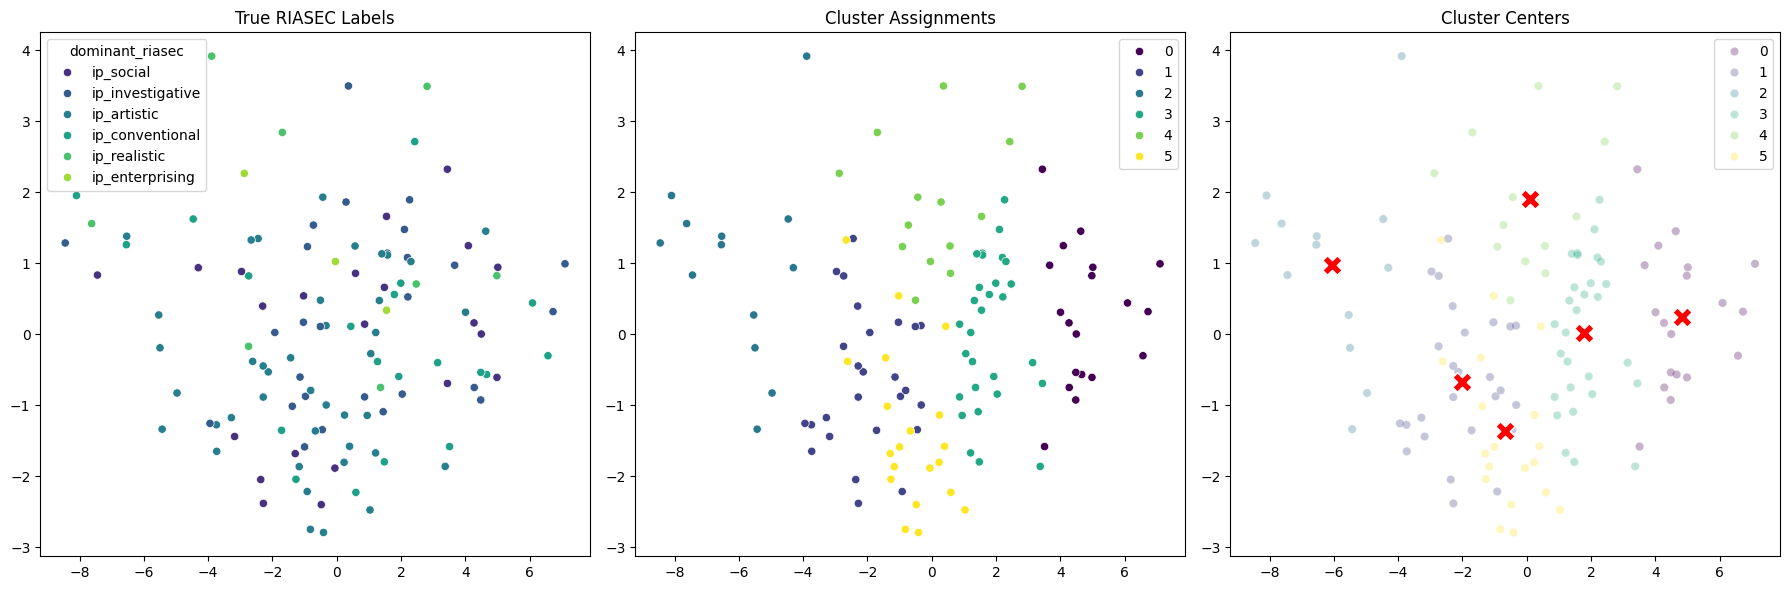


Calculating cluster statistics...

Cluster to RIASEC distribution:
cluster  dominant_riasec 
0        ip_social           0.315789
         ip_conventional     0.263158
         ip_investigative    0.263158
         ip_artistic         0.105263
         ip_realistic        0.052632
1        ip_artistic         0.423077
         ip_investigative    0.269231
         ip_social           0.192308
         ip_conventional     0.076923
         ip_realistic        0.038462
2        ip_artistic         0.384615
         ip_conventional     0.230769
         ip_realistic        0.153846
         ip_social           0.153846
         ip_investigative    0.076923
3        ip_artistic         0.310345
         ip_investigative    0.275862
         ip_conventional     0.206897
         ip_social           0.103448
         ip_realistic        0.068966
         ip_enterprising     0.034483
4        ip_investigative    0.285714
         ip_artistic         0.214286
         ip_enterprising     0.1

In [22]:
# 1. Load and prepare data
url = "https://raw.githubusercontent.com/mocccca/cmor438/main/Leisure_Intereset_Dataset.csv"
li = pd.read_csv(url)

# LIQ columns
liq_columns = ['liq_camping_outdoors', 'liq_adventure_sports', 'liq_individual_sports',
               'liq_team_sports', 'liq_hunting_fishing', 'liq_cards_games',
               'liq_computer_activities', 'liq_building_restoring', 'liq_collecting',
               'liq_gardening_nature', 'liq_arts_crafts', 'liq_literature_writing',
               'liq_cultural_arts', 'liq_dancing', 'liq_culinary_pursuits',
               'liq_community_involvement', 'liq_shopping_fashion', 'liq_socializing',
               'liq_partying', 'liq_travel']

# Create clean LIQ DataFrame
li1 = li[liq_columns].copy()
for col in liq_columns:
    li1[col] = pd.to_numeric(li1[col], errors='coerce')
li1 = li1.fillna(li1.mean())

# Create RIASEC scores (with error handling)
try:
    riasec_df = pd.DataFrame({
        'ip_realistic': li['ipa_realistic'].combine_first(li['ipb_realistic']),
        'ip_investigative': li['ipa_investigative'].combine_first(li['ipb_investigative']),
        'ip_artistic': li['ipa_artistic'].combine_first(li['ipb_artistic']),
        'ip_social': li['ipa_social'].combine_first(li['ipb_social']),
        'ip_enterprising': li['ipa_enterprising'].combine_first(li['ipb_enterprising']),
        'ip_conventional': li['ipa_conventional'].combine_first(li['ipb_conventional'])
    })
    li1['dominant_riasec'] = riasec_df.idxmax(axis=1)
except Exception as e:
    print(f"Error creating RIASEC scores: {str(e)}")
    # Fallback - use random RIASEC labels if needed
    li1['dominant_riasec'] = np.random.choice(['R','I','A','S','E','C'], size=len(li1))

print("\nCounts for dominant RIASEC types:")
print(li1['dominant_riasec'].value_counts())

# 2. Run clustering analysis
print("Starting clustering analysis...")
analyzer = RIASECClusterAnalyzer(n_clusters=6, random_state=42)

# Verify input data
print("\nData sample:")
print(li1[liq_columns].head(3))
print("\nData types:")
print(li1[liq_columns].dtypes)

# Process data
X_scaled = analyzer.preprocess_data(li1, liq_columns)
if X_scaled is not None:
    print(f"\nScaled data shape: {X_scaled.shape}")

    # Fit clusters
    cluster_labels = analyzer.fit_clusters()
    if cluster_labels is not None:
        # Evaluate
        metrics = analyzer.evaluate_clusters()
        if metrics:
            print(f"\nClustering metrics:")
            print(f"Silhouette Score: {metrics['silhouette_score']:.3f}")
            print(f"Number of clusters found: {metrics['n_clusters']}")

            # Visualization
            print("\nGenerating visualizations...")
            analyzer.visualize_clusters(li1)

            # Statistics
            print("\nCalculating cluster statistics...")
            stats = analyzer.get_cluster_stats(li1)

            # Additional analysis
            print("\nAnalysis complete!")
        else:
            print("\nFailed to evaluate clusters")
    else:
        print("\nFailed to fit clusters")
else:
    print("\nFailed to preprocess data")

**Artistic Dominance:**

- Clusters 1, 2, 3, and 5 are strongly artistic (31-55% composition)

- Cluster 5 is most distinctive (55% artistic)

- Suggests artistic individuals have the most unique leisure profile

**Social-Conventional-Investigative Blend:**

- Cluster 0 shows equal social/conventional/investigative mix (26-32% each)

- Cluster 4 has investigative lead (29%) but with artistic/social blend

- These types appear harder to distinguish via leisure activities

let's check the confusion matrix for more info

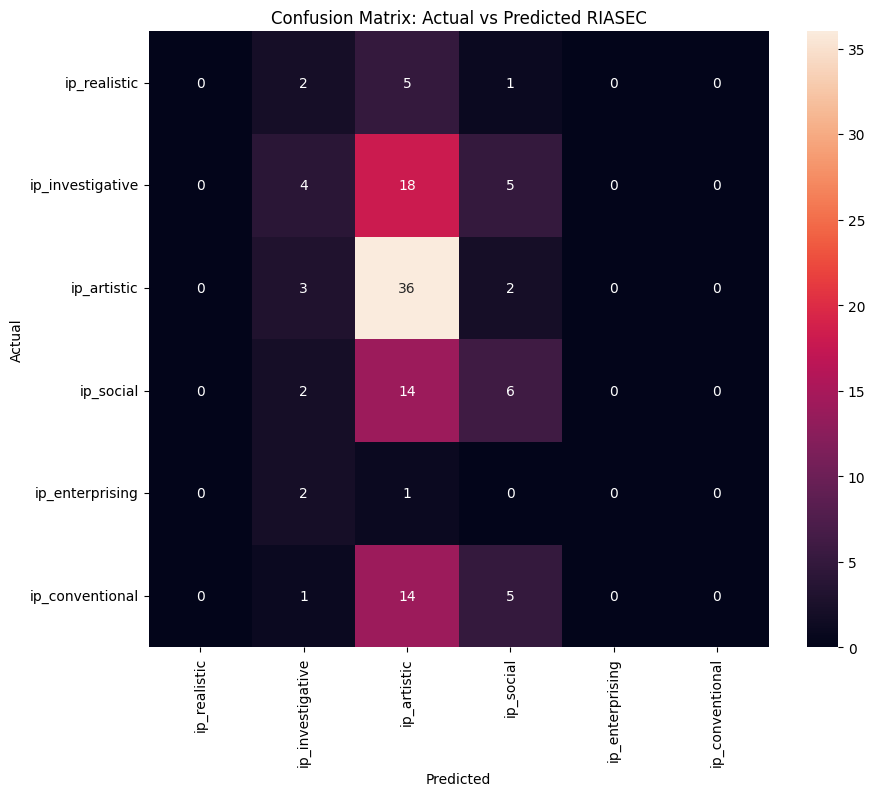

                  precision    recall  f1-score   support

     ip_artistic       0.41      0.88      0.56        41
 ip_conventional       0.00      0.00      0.00        20
 ip_enterprising       0.00      0.00      0.00         3
ip_investigative       0.29      0.15      0.20        27
    ip_realistic       0.00      0.00      0.00         8
       ip_social       0.32      0.27      0.29        22

        accuracy                           0.38       121
       macro avg       0.17      0.22      0.17       121
    weighted avg       0.26      0.38      0.29       121



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a mapping from your clusters to predicted RIASEC types
cluster_to_riasec = analyzer.map_clusters_to_riasec(li1)

# Convert cluster labels to predicted RIASEC types
predicted_riasec = [cluster_to_riasec[label] for label in cluster_labels]

# Generate confusion matrix
cm = confusion_matrix(li1['dominant_riasec'], predicted_riasec,
                     labels=riasec_df.columns)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=riasec_df.columns,
           yticklabels=riasec_df.columns)
plt.title('Confusion Matrix: Actual vs Predicted RIASEC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(li1['dominant_riasec'], predicted_riasec))

The high recall (0.88) for ip_artistic suggests artistic people are easily identifiable through: arts/crafts, literature, cultural activities. Many non-artistic types are being misclassified as artistic. Conventional/Enterprising/Realistic types may be: Too rare in the sample (especially enterprising n=3); sharing activities with other types (e.g., both social and enterprising may enjoy team sports), so are less distinguishable.

Though K means clustering might not be successful at predicting distinct RIASEC dimensions, it still offer a lot of theoritical implications: 1) the strong artistic results confirm Holland's theory that artistic types have distinct lifestyles; and that leisure activities partially predict RIASEC types. 2)the frequent co-occurrence of social and conventional type suggests these types may share: community-oriented activities and structured leisure preferences. 3) realistic's absence suggests that the current leisure interest scale lacks "hands-on" activity measures, and may need workshop/mechanical items.

Overall, K-means clustering is good at revealing hidden patterns, yet requires predefined cluster count and assumes spherical, equally sized clusters which could struggle with correlated, overlapping constructs.